<a href="https://colab.research.google.com/github/yuciferr/yuciferr/blob/main/MNIST_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
#data load
from keras.datasets import mnist

(x_train,y_train) = mnist.load_data()[0]
(x_test,y_test) = mnist.load_data()[1]

In [57]:
#visualize shape and size
print("Shape : ", x_train.shape)
print("Shape : ", x_test.shape)

Shape :  (60000, 28, 28)
Shape :  (10000, 28, 28)


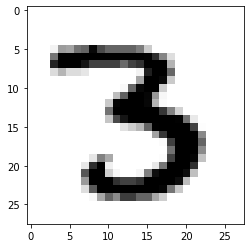

In [58]:
#visualize images
import matplotlib.pyplot as plt

plt.imshow(x_train[12],cmap='gray_r')
plt.show()

In [59]:
#value of pixels

for i in x_train[12]:
  for j in i:
    print("%3s"%j,end='')
  print()

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0 12 99 91142155246182155155155155131 52  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0138254254254254254254254254254254254252210122 33  0  0  0  0  0  0  0  0  0
  0  0  0220254254254235189189189189150189205254254254 75  0  0  0  0  0  0  0  0  0
  0  0  0 35 74 35 35 25  0  0  0  0  0  0 13224254254153  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0 90254254247 53  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  6152246254254 49  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 66158254254249103  8  0  0  0  

In [60]:
#normalization
x_train = x_train.reshape((60000,28*28))
x_train = x_train.astype("float32")/255

x_test = x_test.reshape((10000,28*28))
x_test = x_test.astype("float32")/255

In [61]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [62]:
#creating a model
from keras.models import Sequential
from keras.layers import Dense

model = Sequential() #initialize 
model.add(Dense(units=512, activation="relu", input_dim=(28*28))) #1st hidden layer
#Units are equal to number of nodes in layer.
model.add(Dense(10,activation="softmax")) #output layer

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])


In [63]:
#model training
h = model.fit(x_train, y_train, epochs=5, batch_size=128)


Epoch 1/5
469/469 [==============================] - 4s 7ms/step - loss: 0.2550 - accuracy: 0.9264
Epoch 2/5
469/469 [==============================] - 3s 7ms/step - loss: 0.1027 - accuracy: 0.9689
Epoch 3/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0688 - accuracy: 0.9792
Epoch 4/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0507 - accuracy: 0.9846
Epoch 5/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0379 - accuracy: 0.9889


In [66]:
h_dict = h.history
print("Keys:",h_dict.keys())



Keys: dict_keys(['loss', 'accuracy'])


In [67]:
#Model testing
test_loss, test_acc = model.evaluate(x_test,y_test)
print("Test Loss: ",test_loss,"\nTest Accuracy: ",test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0714 - accuracy: 0.9782
Test Loss:  0.07140043377876282 
Test Accuracy:  0.9782000184059143
